## Analyse univariée

### Imports:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress

Chargement du CSV et affichage du type des données pour chaque colonne. 

In [3]:
df = pd.read_csv('csv/carData.csv')
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

Nous avons trois types de données différents.   
Nous allons nous intéresser plus particulièrement aux données numériques pour notre analyse univariée.  

Maintenant on va afficher un aperçu de nos données:

In [4]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Cela nous permet de voir l'échelle de grandeur des variables. 

On va maintenant analyser notre donnée cible (la Target), à savoir 'Selling_Price'. On a vu qu'elle est de type float. On veut donc vérifier si l'on a un potentiel infini ou un espace restreint sur notre target. 

In [5]:
df['Selling_Price'].unique()

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  3.25,  2.65,  4.9 ,
        4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,  6.  ,  1.95,  3.1 ,  2.35,
        4.95,  5.5 ,  2.95,  4.65,  0.35,  5.85,  2.55,  1.25,  1.05,
        5.8 , 14.9 , 23.  , 18.  , 16.  ,  2.75,  3.6 ,  4.5 ,  4.1 ,
       19.99,  6.95, 18.75, 23.5 , 33.  , 19.75,  4.35, 14.25,  3.95,
        1.5 ,  5.25, 14.5 , 14.73, 12.5 ,  3.49, 35.  ,  5.9 ,  3.45,
        3.8 , 11.25,  3.51,  4.  , 20.75, 17.  ,  7.05,  9.65,  1.75,
        1.7 ,  1.65,  1.45,  1.35,  1.2 ,  1.15,  1.11,  1.1 ,  1.  ,
        0.95,  0.9 ,  0.75,  0.8 ,  0.78,  0.72,  0.65,  0.6 ,  0.55,
        0.52,  0.51,  0.5 ,  0.48,  0.45,  0.42,  0.4 ,  0.38,  0.31,
        0.3 ,  0.27,  0.25,  0.2 ,  0.18,  0.17,  0.16,  0.15,  0.12,
        0.1 ,  5.75,  5.15,  7.9 ,  4.85, 11.75,  3.15,  6.45,  3.5 ,
        8.25,  5.11,  2.7 ,  6.15, 11.45,  3.9 ,  9.1 ,  4.8 ,  2.  ,
        5.35,  6.25,

Nous allons maintenant concentrer notre analyse sur les variables succeptibles de faire varier le prix d'une voiture, à savoir:  
- Year
- Present_Price
- Kms_Driven
- Fuel_Type
- Seller_Type
- Transmission
- Owner

## Calcul des moyennes de chaque variables.

In [6]:
mean_values = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']].mean()
print(mean_values)


Year              2013.627907
Selling_Price        4.661296
Present_Price        7.628472
Kms_Driven       36947.205980
Owner                0.043189
dtype: float64


Nous comprenons donc que dans notre dataset:
- L'année moyenne des voitures en vente est 2013
- Le prix moyen de vente est de 4.7 environ
- Le prix d'usine moyen est de 7.7 environ
- Les voitures ont un kilométrage moyen de 36947 Km
- Les voitures sont en grande majorité neuves car elles n'ont pas connu de propriétaires.

## Calcul des médianes pour chaque variables.

In [7]:
median_values = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']].median()
print(median_values)

Year              2014.0
Selling_Price        3.6
Present_Price        6.4
Kms_Driven       32000.0
Owner                0.0
dtype: float64


## Calcul des quantiles pour chaque variables.

In [8]:
quantiles = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']].quantile([0.25, 0.5, 0.75])
print(quantiles)


        Year  Selling_Price  Present_Price  Kms_Driven  Owner
0.25  2012.0            0.9            1.2     15000.0    0.0
0.50  2014.0            3.6            6.4     32000.0    0.0
0.75  2016.0            6.0            9.9     48767.0    0.0


## Distribution des données.

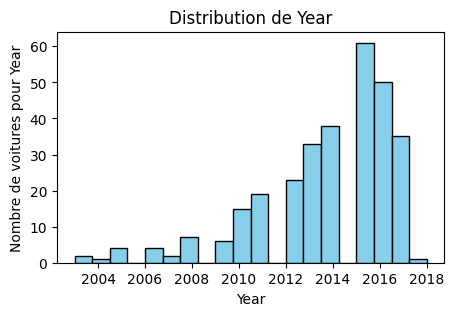

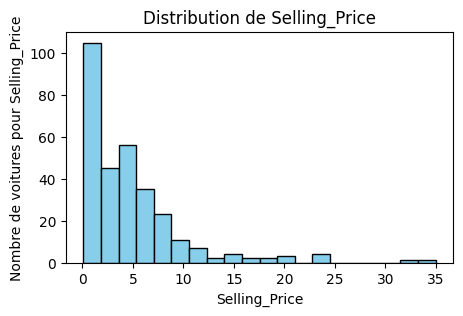

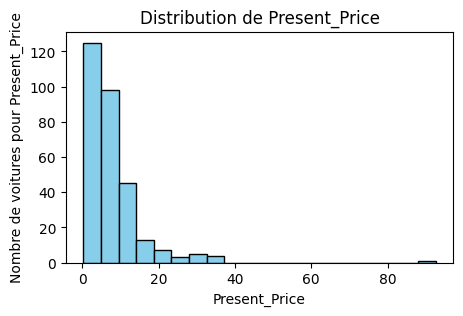

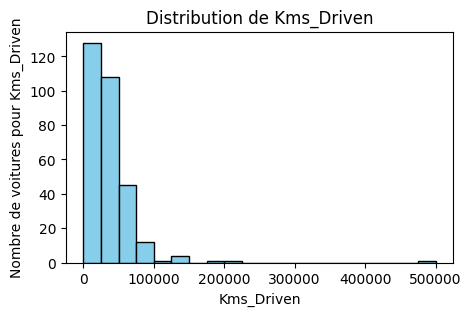

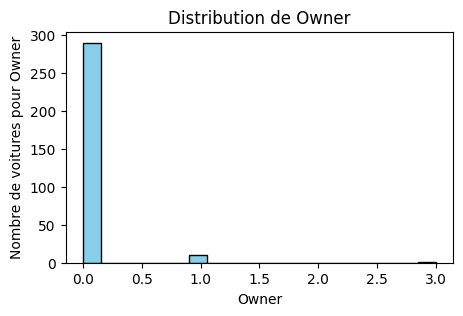

In [9]:
variables = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

for var in variables:
    plt.figure(figsize=(5, 3))
    plt.hist(df[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution de {var}')
    plt.xlabel(var) 
    plt.ylabel(f'Nombre de voitures pour {var}') 
    plt.show() 

Maintenant que nous avons fais nos analyses pour les variables numériques, passons aux catégorielles. Nous allons afficher le nombre de voitures dans chaque variable catégorielle. 

In [10]:
fuel_type_counts = df['Fuel_Type'].value_counts()
print("Nombre de voitures par type de carburant:")
print(fuel_type_counts)
print("\n") 

seller_type_counts = df['Seller_Type'].value_counts()
print("Nombre de voitures par type de vendeur:")
print(seller_type_counts)
print("\n")

transmission_counts = df['Transmission'].value_counts()
print("Nombre de voitures par type de transmission:")
print(transmission_counts)

Nombre de voitures par type de carburant:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


Nombre de voitures par type de vendeur:
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


Nombre de voitures par type de transmission:
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


On affiche la taille du jeu de données:

In [11]:
nb_lignes, nb_colonnes = df.shape

print(f"Le jeu de données contient {nb_lignes} lignes (observations) et {nb_colonnes} colonnes (variables).")

Le jeu de données contient 301 lignes (observations) et 9 colonnes (variables).


Nous pouvons voir qu'il n'y a pas de valeurs manquantes dans nos données catégorielles.

### Maintenant cherchons des relations entre nos variables nuémriques: 

Corrélation

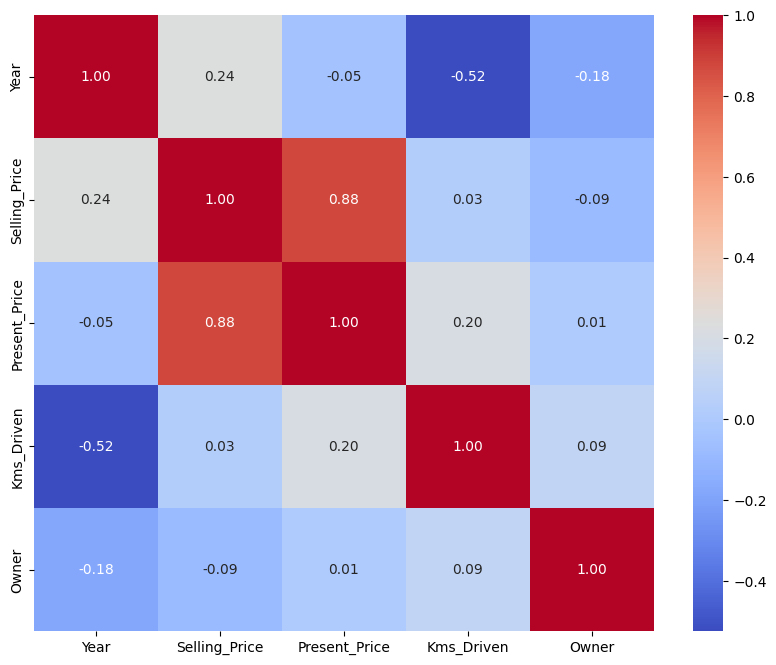

In [12]:
corr = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.show()

Boxplots pour Variables Numériques par Catégories

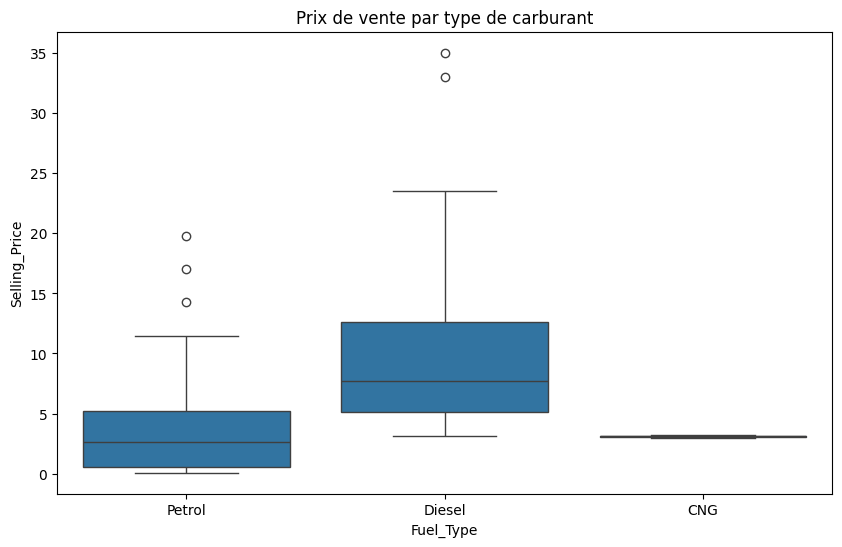

In [13]:
# Avec la catégorie 'Fuel_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Prix de vente par type de carburant')
plt.show()

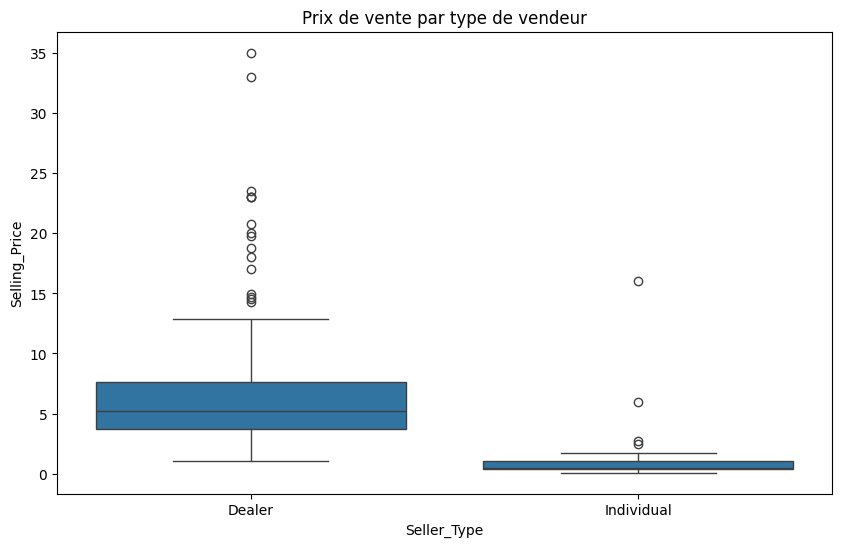

In [14]:
# Avec la catégorie 'Seller_Type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title('Prix de vente par type de vendeur')
plt.show()

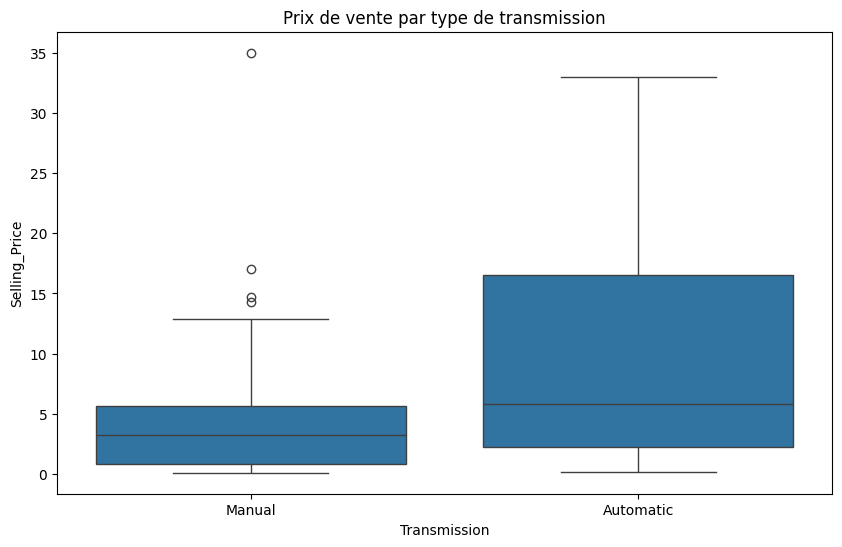

In [15]:
# Avec la catégorie 'Transmission'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Prix de vente par type de transmission')
plt.show()

Pair Plot pour Visualiser les Relations

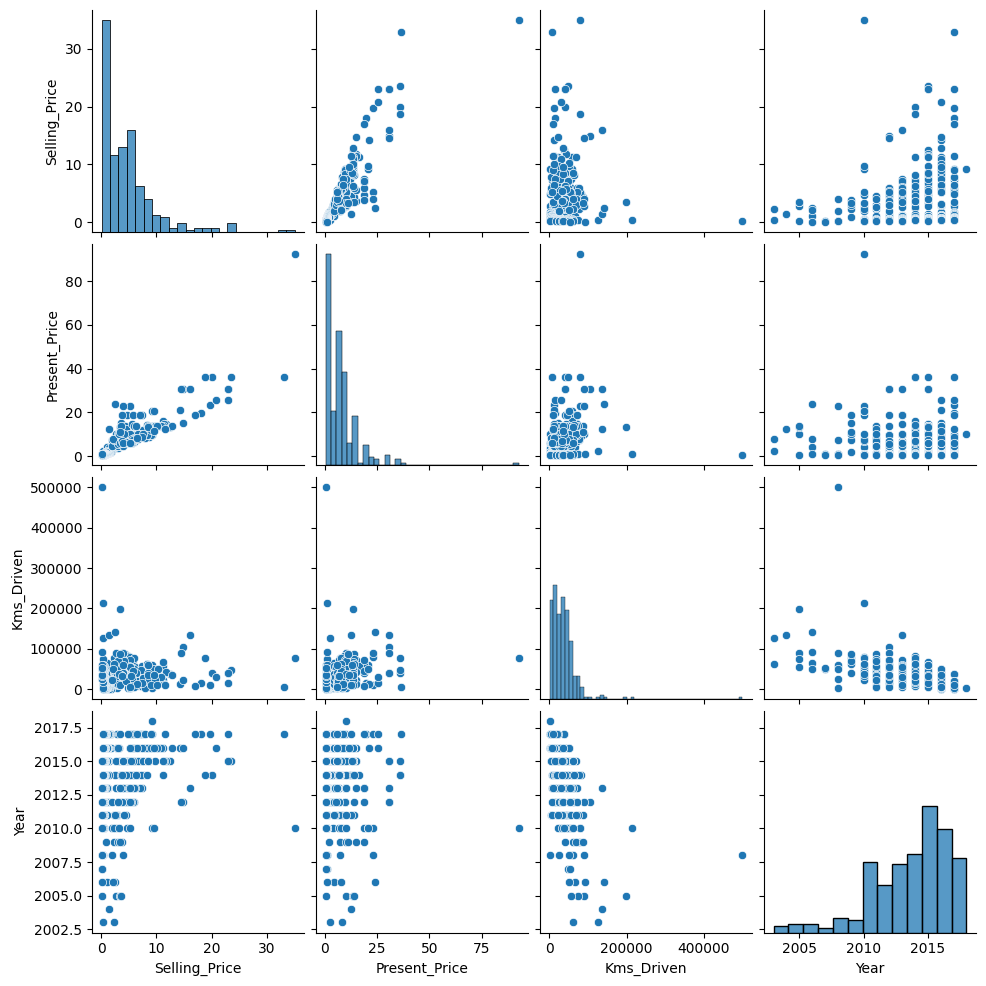

In [16]:
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Year']])
plt.show()

Density Plot

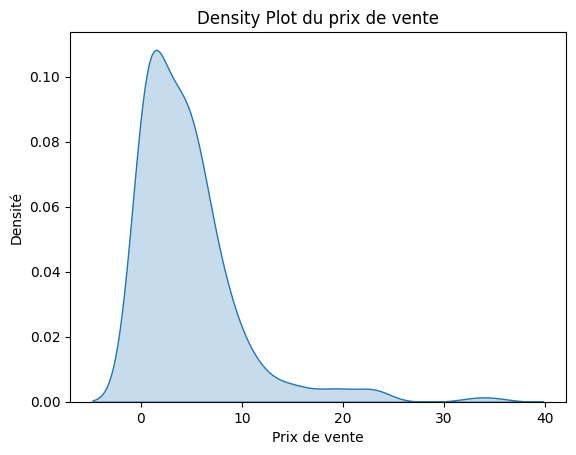

In [17]:
sns.kdeplot(df['Selling_Price'], fill=True)
plt.title('Density Plot du prix de vente')
plt.xlabel('Prix de vente')
plt.ylabel('Densité')
plt.show()

## 4. Quantification de la relation entre l'age d'une voiture et son prix de vente.

                Car_Age  Selling_Price
Car_Age        1.000000      -0.236141
Selling_Price -0.236141       1.000000


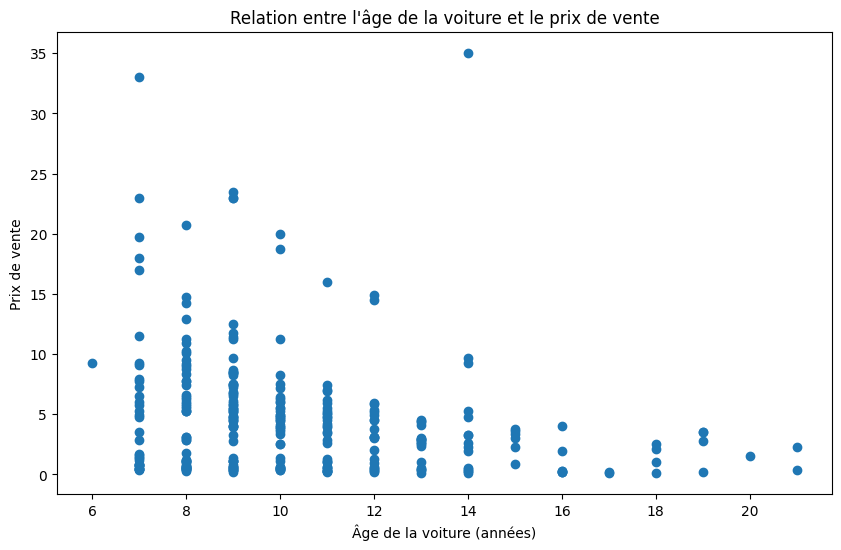

In [18]:
df['Car_Age'] = 2024 - df['Year']
mean_age = df['Car_Age'].mean()

correlation_age_selling_price = df[['Car_Age', 'Selling_Price']].corr()
print(correlation_age_selling_price)

plt.figure(figsize=(10, 6))
plt.scatter(df['Car_Age'], df['Selling_Price'])
plt.title('Relation entre l\'âge de la voiture et le prix de vente')
plt.xlabel('Âge de la voiture (années)')
plt.ylabel('Prix de vente')
plt.show()

Nous pouvons voir avec ces résultats que plus une voiture est vieille moins son prix est élevé.

### Veille sur la régréssion linéaire.


Dans le machine learning, des programmes informatiques appelés algorithmes analysent de grands jeux de données et travaillent à rebours à partir de ces données pour calculer l'équation de régression linéaire. Les scientifiques des données entraînent d'abord l'algorithme sur des jeux de données connus ou étiquetés, puis l'utilisent pour prédire des valeurs inconnues. Les données réelles sont plus complexes que dans l'exemple précédent. C'est pourquoi l'analyse de régression linéaire doit modifier ou transformer mathématiquement les valeurs des données pour répondre aux quatre hypothèses suivantes.

**Relation linéaire**
Une relation linéaire doit exister entre les variables indépendantes et dépendantes. Pour déterminer cette relation, les scientifiques des données créent un nuage de points, une collection aléatoire de valeurs x et y, pour voir s'ils se situent le long d'une ligne droite. Si tel n'est pas le cas, vous pouvez appliquer des fonctions non linéaires telles que la racine carrée ou le journal pour créer mathématiquement la relation linéaire entre les deux variables.

**Indépendance résiduelle**
Les scientifiques des données utilisent des valeurs résiduelles pour mesurer la précision des prévisions. Une valeur résiduelle est la différence entre les données observées et la valeur prédite. Les valeurs résiduelles ne doivent pas présenter de schéma identifiable entre elles. Par exemple, vous ne voulez pas que les valeurs résiduelles augmentent avec le temps. Vous pouvez utiliser différents tests mathématiques, tels que le test de Durbin-Watson, pour déterminer l'indépendance résiduelle. Vous pouvez utiliser des données factices pour remplacer toute variation de données, telle que les données saisonnières.

**Normalité**
Les techniques graphiques telles que les diagrammes Q-Q déterminent si les valeurs résiduelles sont normalement distribuées. Les valeurs résiduelles doivent se situer le long d'une ligne diagonale au centre du graphique. Si les valeurs résiduelles ne sont pas normalisées, vous pouvez tester les données pour rechercher des valeurs aberrantes aléatoires ou des valeurs qui ne sont pas typiques. La suppression des valeurs aberrantes ou l'exécution de transformations non linéaires peuvent résoudre le problème.

**Homoscédasticité**
L'homoscédasticité suppose que les valeurs résiduelles ont une variance constante ou un écart type par rapport à la moyenne pour chaque valeur de x. Dans le cas contraire, les résultats de l'analyse risquent de ne pas être exacts. Si cette hypothèse n'est pas respectée, vous devrez peut-être modifier la variable dépendante. Comme la variance se produit naturellement dans les grands jeux de données, il est logique de modifier l'échelle de la variable dépendante. Par exemple, au lieu d'utiliser la taille de la population pour prédire le nombre de casernes de pompiers dans une ville, vous pouvez utiliser la taille de la population pour prédire le nombre de casernes de pompiers par personne.

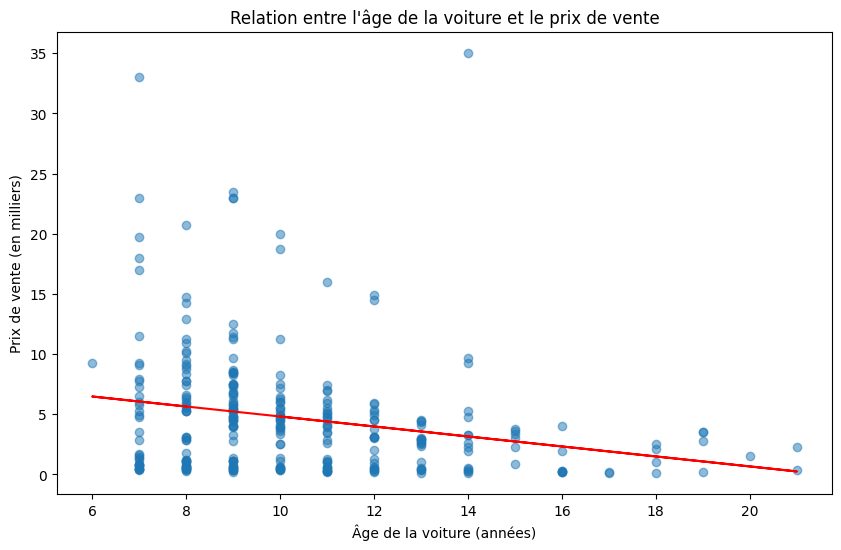

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Car_Age'], df['Selling_Price'], alpha=0.5) 
plt.title('Relation entre l\'âge de la voiture et le prix de vente')
plt.xlabel('Âge de la voiture (années)')
plt.ylabel('Prix de vente (en milliers)')

m, b = np.polyfit(df['Car_Age'], df['Selling_Price'], 1)
plt.plot(df['Car_Age'], m*df['Car_Age'] + b, color='red')
plt.show()


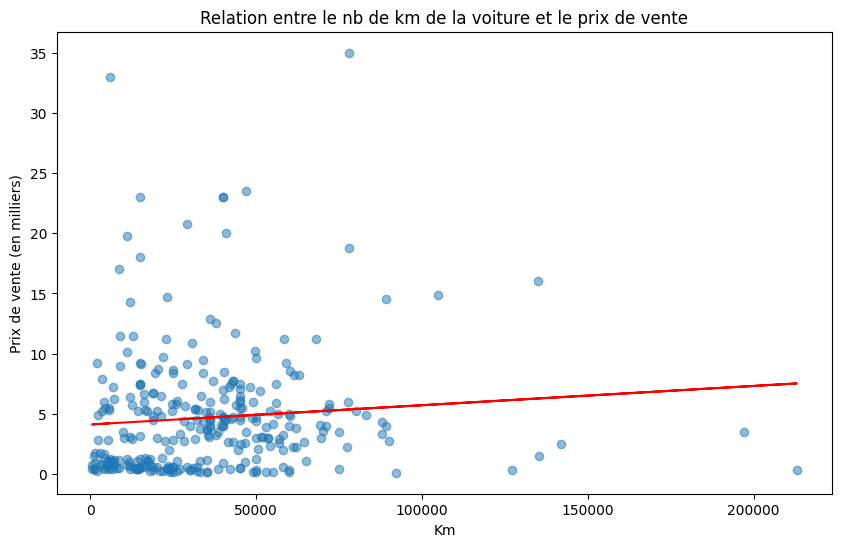

In [20]:
max_kms_driven = df['Kms_Driven'].max()

df_filtered = df[df['Kms_Driven'] != max_kms_driven]

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Kms_Driven'], df_filtered['Selling_Price'], alpha=0.5)
plt.title('Relation entre le nb de km de la voiture et le prix de vente')
plt.xlabel('Km')
plt.ylabel('Prix de vente (en milliers)')

n, c = np.polyfit(df_filtered['Kms_Driven'], df_filtered['Selling_Price'], 1)
plt.plot(df_filtered['Kms_Driven'], n*df_filtered['Kms_Driven'] + c, color='red')
plt.show()

En voulant tracer une ligne de regression sur la relation entre le nombre de kilomètres d'une voiture et son prix de vente, nous nous sommes aperçu que la ligne est ascendante. Ce qui ne parait pas logique car communément, plus une voiture a roulé plus elle perd de sa valeur. 
Nous avons donc décidé de faire un boxplot du prix de vente pour vérifier les outliers.

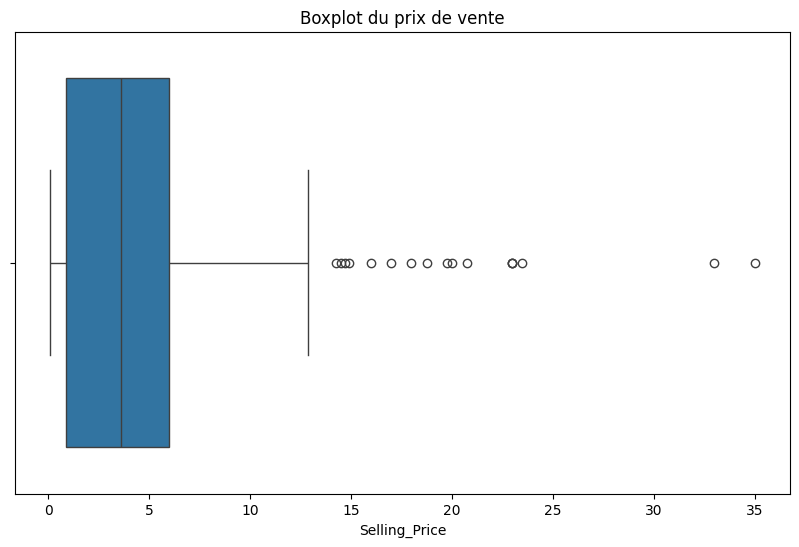

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Selling_Price'])
plt.title('Boxplot du prix de vente')
plt.show()

Nous pouvons voir qu'il y a des entrées potentiellement abérrantes.On va donc approfondir la recherche en faisant le calcul de l'écart interquartiles (IQR).

In [22]:
Q1 = df['Selling_Price'].quantile(0.25)
Q3 = df['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Selling_Price'] < lower_bound) | (df['Selling_Price'] > upper_bound)]
print(f"Nombre d'outliers dans 'Selling_Price': {len(outliers)}")

outliers_df = outliers[['Car_Name', 'Year', 'Kms_Driven', 'Selling_Price', 'Present_Price']]
print(outliers_df)

Nombre d'outliers dans 'Selling_Price': 17
         Car_Name  Year  Kms_Driven  Selling_Price  Present_Price
50       fortuner  2012      104707          14.90          30.61
51       fortuner  2015       40000          23.00          30.61
52         innova  2017       15000          18.00          19.77
53       fortuner  2013      135000          16.00          30.61
59       fortuner  2014       41000          19.99          35.96
62       fortuner  2014       78000          18.75          35.96
63       fortuner  2015       47000          23.50          35.96
64       fortuner  2017        6000          33.00          36.23
66         innova  2017       11000          19.75          23.15
69  corolla altis  2016       12000          14.25          20.91
79       fortuner  2012       89000          14.50          30.61
80  corolla altis  2016       23000          14.73          14.89
82         innova  2017       15000          23.00          25.39
86   land cruiser  2010       780

Aux vues de ces résultats nous pouvons donc dire que ces valeurs ne sont pas abérrantes, elles paraissent logiques. Les prix de ventes élevés s'expliquent soit par le faible kilométrage soit par l'année de la voiture. 

## 5. Application de l'algorithme de régression linéaire univariée.

Utilisation de la fonction linegress de Scipy. Dans le code ci-dessous: 

"slope": Est la pente qui indique la variation du prix de vente pour chaque année supplémentaire d'âge de la voiture.   
"intercept": Représente le prix de vente estimé théorique d'une voiture de 0 an.  
"r_value": Mesure la force et la direction de la relation linéaire entre l'âge de la voiture et son prix de vente.  
"p_value": Est la probabilité que la corrélation observée entre les deux variables soit due au hasard. Si p est faible cela indique que la relation est statistiquement significative.  
"std_err": Estime la précision de la pente calculée. Plus la valeur est faible plus l'estimation est précise.  

Coefficient (pente) : -0.4150916946355401
Intercept (ordonnée à l'origine) : 8.966665351003842
Coefficient de corrélation (r) : -0.23614098016042762
Valeur p : 3.495472434809037e-05
Erreur standard de la pente : 0.09878197293762848


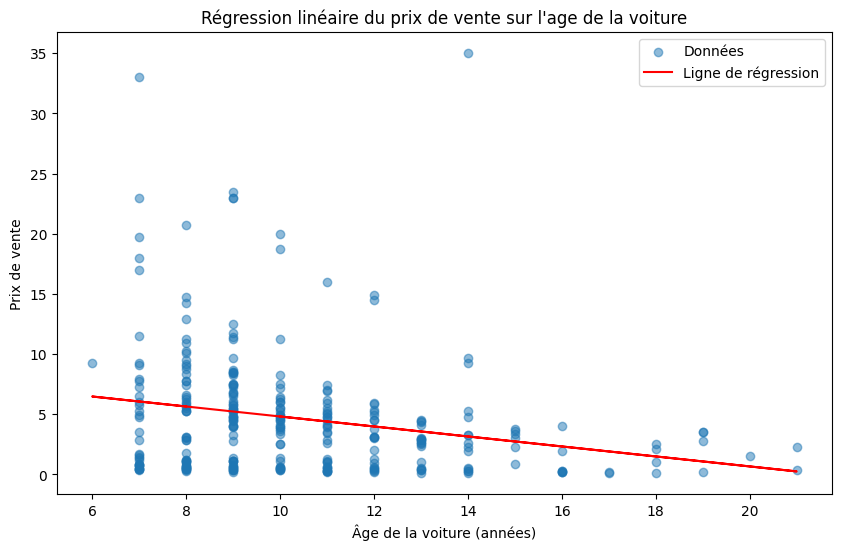

In [23]:
slope, intercept, r_value, p_value, std_err = linregress(df['Car_Age'], df['Selling_Price'])

print(f"Coefficient (pente) : {slope}")
print(f"Intercept (ordonnée à l'origine) : {intercept}")
print(f"Coefficient de corrélation (r) : {r_value}")
print(f"Valeur p : {p_value}")
print(f"Erreur standard de la pente : {std_err}")

plt.figure(figsize=(10, 6))
plt.scatter(df['Car_Age'], df['Selling_Price'], alpha=0.5, label='Données')
plt.plot(df['Car_Age'], intercept + slope*df['Car_Age'], 'r', label='Ligne de régression')
plt.title("Régression linéaire du prix de vente sur l'age de la voiture")
plt.xlabel('Âge de la voiture (années)')
plt.ylabel('Prix de vente')
plt.legend()
plt.show()

Nous faisons la même chose mais avec l'année de la voiture et non son âge.

Coefficient (pente) : 0.4150916946355392
Intercept (ordonnée à l'origine) : -831.1789245913275
Coefficient de corrélation (r) : 0.23614098016042726
Valeur p : 3.495472434809148e-05
Erreur standard de la pente : 0.09878197293762843


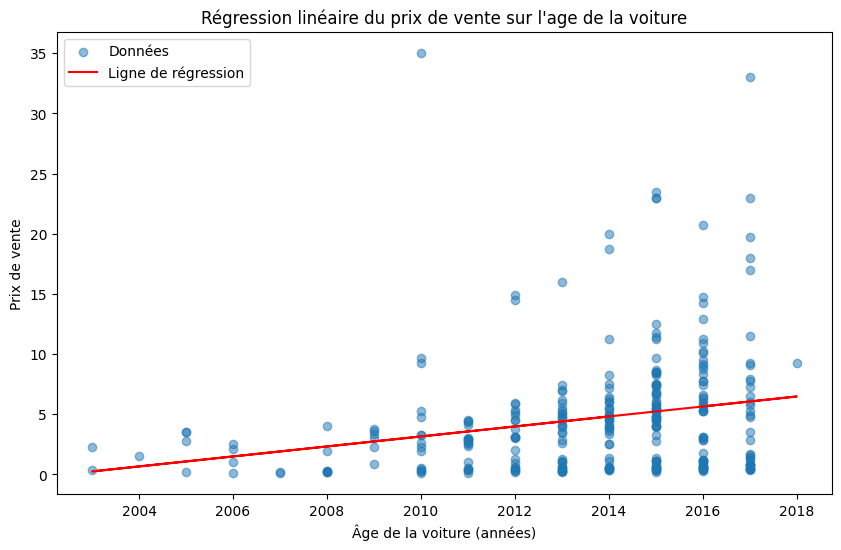

In [24]:
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Selling_Price'])

print(f"Coefficient (pente) : {slope}")
print(f"Intercept (ordonnée à l'origine) : {intercept}")
print(f"Coefficient de corrélation (r) : {r_value}")
print(f"Valeur p : {p_value}")
print(f"Erreur standard de la pente : {std_err}")

plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Selling_Price'], alpha=0.5, label='Données')
plt.plot(df['Year'], intercept + slope*df['Year'], 'r', label='Ligne de régression')
plt.title("Régression linéaire du prix de vente sur l'age de la voiture")
plt.xlabel('Âge de la voiture (années)')
plt.ylabel('Prix de vente')
plt.legend()
plt.show()

## Interprétation des résultats 

Après avoir appliqué l'algorithme de régression linéaire univariée voici comment nous pouvons interpréter nos résultats:  

- **Le coefficient** (ou la pente) est de 0.415, ce qui indique une augmentation de prix de vente associée a l'augmentation de la variable indépendante (Year). Donc pour chaque unité supplémentaire de cette variable indépendante, le prix de vente estimé augmente de 0.415 unité. Donc la relation entre les deux variables est positive.  

- **L'intercept** est nettement négatif, ce qui suggère que si la valeur de la variable indépendante était de 0, alors le prix de vente serait négatif.  

- **Le coefficient de relation** est de 0.236 ce qui indique une corrélation positive faible entre les deux variables. Il y a donc une relation positive mais mais la force de cette relation est faible.  

- **La valeur p** reste très faible, indiquant que la relation observée (la pente positive) est statistiquement significative, malgré la faible corrélation. Cela signifie que la relation positive entre la variable indépendante et le prix de vente n'est probablement pas due au hasard.  

- **L'erreur standard** de la pente est identique à l'analyse précédente, ce qui suggère que la précision de l'estimation de la pente est similaire.  



## 6. Regression linéaire multiple

In [25]:
df_with_dummies = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

X = df_with_dummies[['Kms_Driven'] + [col for col in df_with_dummies.columns if 'Fuel_Type' in col]]
y = df_with_dummies['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 4.1515915525284885
R²: 0.251778811870638


c:\wamp64\www\new-car\new-car-env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 7. Evaluation des modèles.

In [26]:
df_with_dummies = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission'], drop_first=True)

X = df_with_dummies[['Year', 'Kms_Driven'] + [col for col in df_with_dummies.columns if 'Fuel_Type' in col or 'Transmission' in col]]
y = df_with_dummies['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False) 
r2 = r2_score(y_test, y_pred) 

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 3.668484988661629
R²: 0.41578291186048244


c:\wamp64\www\new-car\new-car-env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 8. Conclusion d'analyse

Après avoir utilisé la régression linéaire multiple avec plusieurs variables, nous pouvons constater que des variables comme 'Kms_Driven', 'Transmission', 'Fuel_Type' ou encore 'Year' sont succeptibles de faire varier le prix d'une voiture. 
Par exemple, plus une voiture est vieille moins elle est chère, plus elle a parcouru de kilomètres moins elle est chère aussi.

## 9. Aidons Martin à estimer le prix de sa voiture.

In [28]:
car_year = 2023 - 6  
kms_driven = 100000 

features = np.zeros(len(X_train.columns))

features[0] = car_year
features[1] = kms_driven

features[-1] = 1

features_reshaped = features.reshape(1, -1)

predicted_price = model.predict(features_reshaped)
print(f"Le prix estimé de la voiture est de: {predicted_price[0]:.2f} unités")

Le prix estimé de la voiture est de: 4.49 unités


c:\wamp64\www\new-car\new-car-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
